In [1588]:
import pandas as pd
import requests
import json

#

In [1589]:
df = pd.read_csv("tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
268,25.12,6.54,Female,No,Sun,Lunch,2
269,24.08,3.92,Male,No,Thur,Dinner,4
270,26.27,6.50,Female,Yes,Sat,Lunch,2
271,41.21,8.90,Female,Yes,Thur,Lunch,2


In [1590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  273 non-null    float64
 1   tip         273 non-null    float64
 2   sex         273 non-null    object 
 3   smoker      273 non-null    object 
 4   day         273 non-null    object 
 5   time        273 non-null    object 
 6   size        273 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.1+ KB


In [1591]:
df.describe()

,total_bill,tip,size
count,273.000000,273.000000,273.000000
mean,19.693993,3.008425,2.564103
std,8.908107,1.481192,0.937629
min,3.070000,0.400000,1.000000
25%,13.280000,2.000000,2.000000
50%,17.510000,2.740000,2.000000
75%,24.080000,3.600000,3.000000
max,50.810000,10.000000,6.000000


at this stage

In [1592]:
def cur_cnvrt_USD_to_RUB():
    d = requests.get("https://www.cbr-xml-daily.ru/latest.js")
    d = json.loads(d.content)
    cur_RUB = 1 / d['rates']["USD"]
    return int( cur_RUB)
df["total_bill"] = df["total_bill"]*cur_cnvrt_USD_to_RUB()
df["tip"] = df["tip"]*cur_cnvrt_USD_to_RUB()
df["tip_%_bill"] = (df["tip"] * 100)/df["total_bill"]
df["tip_per_person"] = df["tip"]/df["size"]
df

,total_bill,tip,sex,smoker,day,time,size,tip_%_bill,tip_per_person
0,1546.09,91.91,Female,No,Sun,Dinner,2,5.944673,45.955000
1,940.94,151.06,Male,No,Sun,Dinner,3,16.054159,50.353333
2,1911.91,318.50,Male,No,Sun,Dinner,3,16.658734,106.166667
3,2154.88,301.21,Male,No,Sun,Dinner,2,13.978041,150.605000
4,2237.69,328.51,Female,No,Sun,Dinner,4,14.680765,82.127500
...,...,...,...,...,...,...,...,...,...
268,2285.92,595.14,Female,No,Sun,Lunch,2,26.035032,297.570000
269,2191.28,356.72,Male,No,Thur,Dinner,4,16.279070,89.180000
270,2390.57,591.50,Female,Yes,Sat,Lunch,2,24.743053,295.750000
271,3750.11,809.90,Female,Yes,Thur,Lunch,2,21.596700,404.950000


at this stage

In [1593]:
df1=df.loc[df["sex"]=="Female"]


x = [['median', df1['total_bill'].median(), df1['tip'].median(), df1['tip_%_bill'].median(), df1['tip_per_person'].median()],
     ['mean', df1['total_bill'].mean(), df1['tip'].mean(), df1['tip_%_bill'].mean(), df1['tip_per_person'].mean()],
     ['max', df1['total_bill'].max(), df1['tip'].max(), df1['tip_%_bill'].max(), df1['tip_per_person'].max()],
     ['min', df1['total_bill'].min(), df1['tip'].min(), df1['tip_%_bill'].min(), df1['tip_per_person'].min()]]
pd.DataFrame(x, columns=['name', 'bill', 'tip', 'tip%', 'tip_per_person'])

,name,bill,tip,tip%,tip_per_person
0,median,1492.400000,237.51000,15.384615,101.465000
1,mean,1698.262222,269.31404,16.548686,114.007833
2,max,4146.870000,809.90000,41.666667,404.950000
3,min,279.370000,91.00000,5.679667,41.253333


at this stage

In [1594]:
df2=df.loc[df["sex"]=="Male"]


x = [['median', df2['total_bill'].median(), df2['tip'].median(), df2['tip_%_bill'].median(), df2['tip_per_person'].median()],
     ['mean', df2['total_bill'].mean(), df2['tip'].mean(), df2['tip_%_bill'].mean(), df2['tip_per_person'].mean()],
     ['max', df2['total_bill'].max(), df2['tip'].max(), df2['tip_%_bill'].max(), df2['tip_per_person'].max()],
     ['min', df2['total_bill'].min(), df2['tip'].min(), df2['tip_%_bill'].min(), df2['tip_per_person'].min()]]
pd.DataFrame(x, columns=['name', 'bill', 'tip', 'tip%', 'tip_per_person'])

,name,bill,tip,tip%,tip_per_person
0,median,1663.935000,261.170000,15.390646,92.365000
1,mean,1845.574138,276.300057,15.865363,110.376288
2,max,4623.710000,910.000000,71.034483,409.500000
3,min,659.750000,36.400000,3.563814,18.200000


at this stage

C:\Users\sergs\AppData\Local\Temp\ipykernel_30516\3681910745.py:26: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


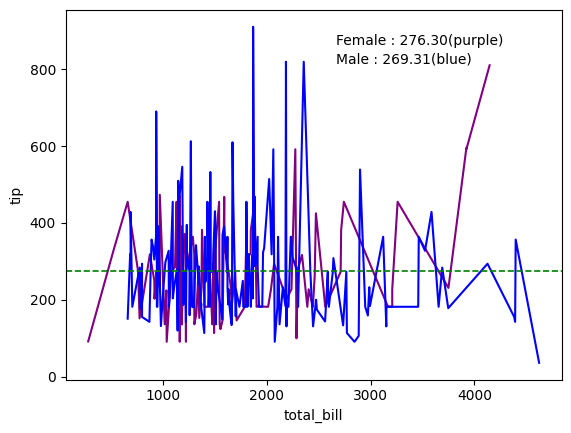

In [1595]:
import matplotlib.pyplot as plt 

st1 = df.loc[df["sex"] == "Female"]
st = st1.sort_values(by=["total_bill", "tip", "tip_%_bill", "tip_per_person"], ascending=True)
st2 = df.loc[df["sex"] == "Male"]
stI = st2.sort_values(by=["total_bill", "tip", "tip_%_bill", "tip_per_person"], ascending=True)

plt.plot(st["total_bill"], st1["tip"], color='purple')
plt.plot(stI["total_bill"], st2["tip"], color='blue')
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.axhline(y = df['tip'].mean(), color='green', linestyle='--', linewidth=1.2)


k1 = str(st1['tip'].mean())
k2 = str(st2['tip'].mean())

plt.subplot(15, 2, 4)
plt.axis(False)
plt.text(0, 0.5, 'Female : ' + k2[:6] + '(purple)')
plt.subplot(10, 2, 4)
plt.axis(False)
plt.text(0, 0.5, 'Male : ' + k1[:6] + '(blue)')


plt.tight_layout()

at this stage

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


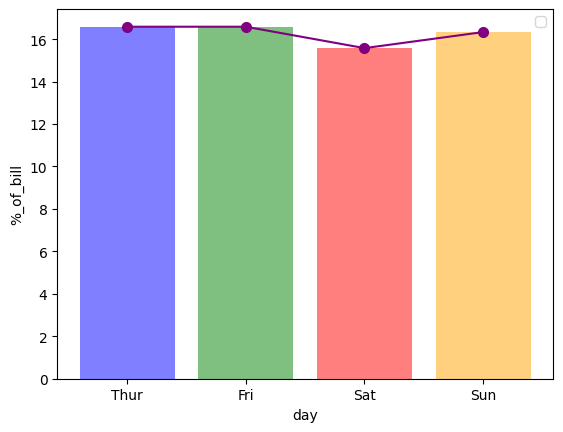

In [1596]:
import matplotlib.pyplot as plt 

st1 = df.loc[df["day"] == "Sat"]
st2 = df.loc[df["day"] == "Sun"]
st3 = df.loc[df["day"] == "Thur"]
st4 = df.loc[df["day"] == "Fri"]



a1 = st1["tip_%_bill"].mean()
a2 = st2["tip_%_bill"].mean()
a3 = st3["tip_%_bill"].mean()
a4 = st3["tip_%_bill"].mean()

x = ['Thur', 'Fri', 'Sat', 'Sun']
y = [a3, a4, a1, a2]

plt.bar(x, y, alpha = 0.5, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('day')
plt.plot(x, y, color='purple', marker='o', markersize=7)
plt.ylabel('%_of_bill')
plt.legend()
plt.show()

at this stage

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


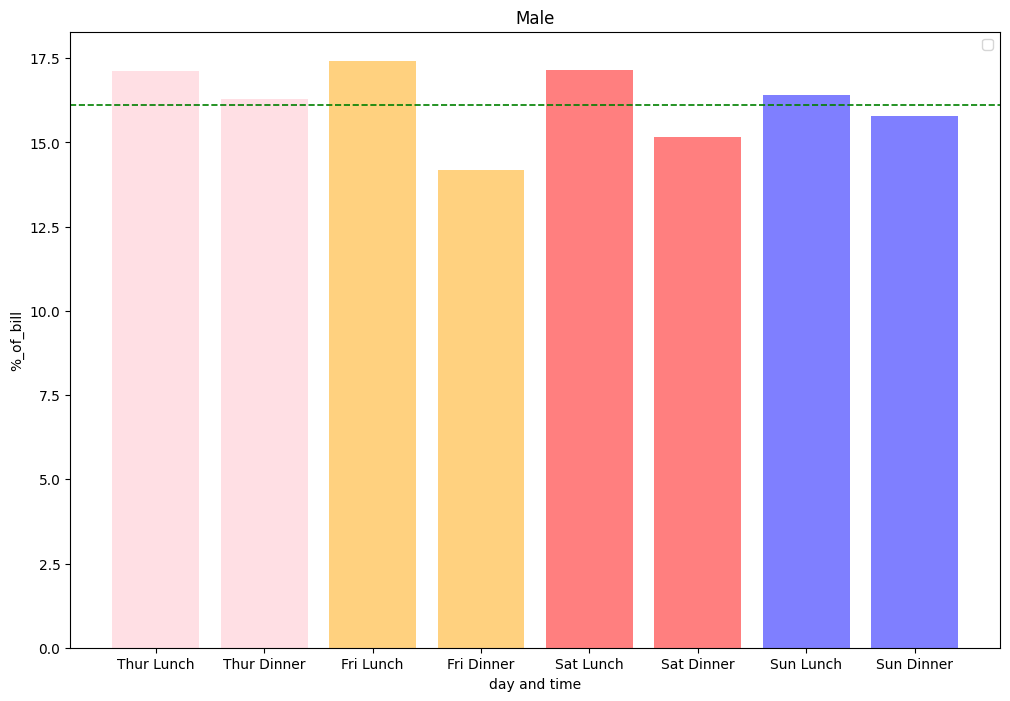

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

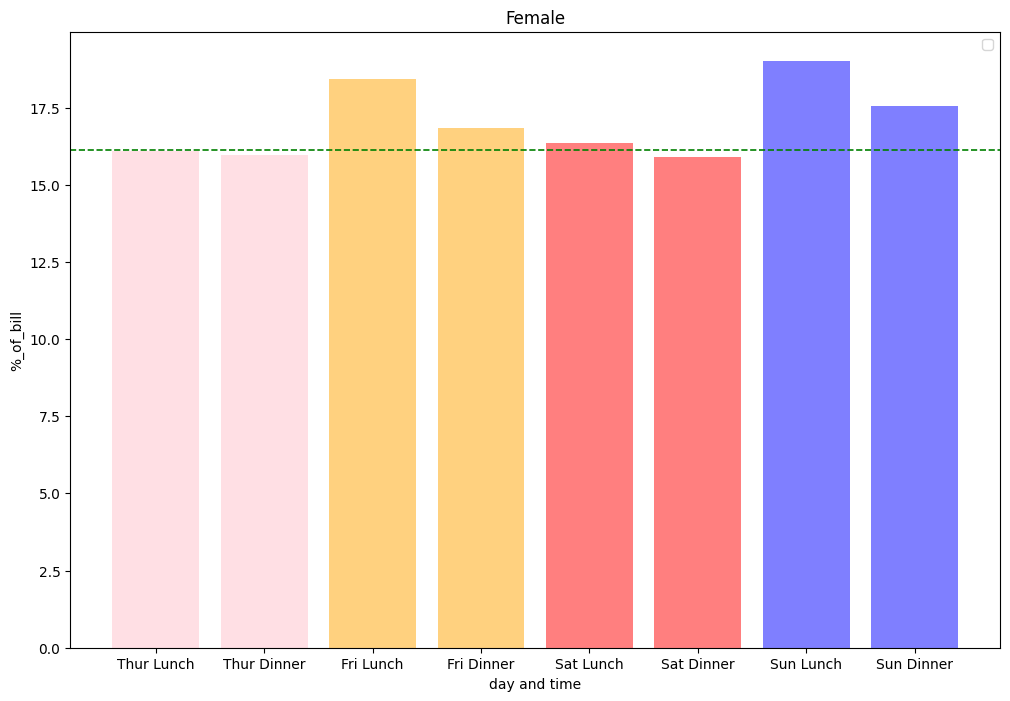

<Figure size 640x480 with 0 Axes>

In [1597]:
import matplotlib.pyplot as plt 

mal = df.loc[df["sex"] == "Male"]
st1 = mal.loc[df["day"] == "Thur"]
st2 = mal.loc[df["day"] == "Fri"]
st3 = mal.loc[df["day"] == "Sat"]
st4 = mal.loc[df["day"] == "Sun"]

st11 = st1.loc[df["time"] == "Lunch"]
st12 = st1.loc[df["time"] == "Dinner"]
st21 = st2.loc[df["time"] == "Lunch"]
st22 = st2.loc[df["time"] == "Dinner"]
st31 = st3.loc[df["time"] == "Lunch"]
st32 = st3.loc[df["time"] == "Dinner"]
st41 = st4.loc[df["time"] == "Lunch"]
st42 = st4.loc[df["time"] == "Dinner"]

a11 = st11["tip_%_bill"].mean()
a12 = st12["tip_%_bill"].mean()
a21 = st21["tip_%_bill"].mean()
a22 = st22["tip_%_bill"].mean()
a31 = st31["tip_%_bill"].mean()
a32 = st32["tip_%_bill"].mean()
a41 = st41["tip_%_bill"].mean()
a42 = st42["tip_%_bill"].mean()

x = ['Thur Lunch', 'Thur Dinner', 'Fri Lunch', 'Fri Dinner', 'Sat Lunch', 'Sat Dinner', 'Sun Lunch', 'Sun Dinner']
y = [a11, a12, a21, a22, a31, a32, a41, a42]
plt.figure(figsize=(12, 8))
plt.bar(x, y, alpha = 0.5, color=['pink', 'pink', 'orange', 'orange', 'red', 'red', 'blue', 'blue'])
plt.axhline(y = df["tip_%_bill"].mean(), color='green', linestyle='--', linewidth=1.2)
plt.xlabel('day and time')
plt.ylabel('%_of_bill')
plt.title('Male')
plt.legend()
plt.show()
plt.tight_layout()


fem = df.loc[df["sex"] == "Female"]
st1 = fem.loc[df["day"] == "Thur"]
st2 = fem.loc[df["day"] == "Fri"]
st3 = fem.loc[df["day"] == "Sat"]
st4 = fem.loc[df["day"] == "Sun"]

st11 = st1.loc[df["time"] == "Lunch"]
st12 = st1.loc[df["time"] == "Dinner"]
st21 = st2.loc[df["time"] == "Lunch"]
st22 = st2.loc[df["time"] == "Dinner"]
st31 = st3.loc[df["time"] == "Lunch"]
st32 = st3.loc[df["time"] == "Dinner"]
st41 = st4.loc[df["time"] == "Lunch"]
st42 = st4.loc[df["time"] == "Dinner"]

a11 = st11["tip_%_bill"].mean()
a12 = st12["tip_%_bill"].mean()
a21 = st21["tip_%_bill"].mean()
a22 = st22["tip_%_bill"].mean()
a31 = st31["tip_%_bill"].mean()
a32 = st32["tip_%_bill"].mean()
a41 = st41["tip_%_bill"].mean()
a42 = st42["tip_%_bill"].mean()

x = ['Thur Lunch', 'Thur Dinner', 'Fri Lunch', 'Fri Dinner', 'Sat Lunch', 'Sat Dinner', 'Sun Lunch', 'Sun Dinner']
y = [a11, a12, a21, a22, a31, a32, a41, a42]
plt.figure(figsize=(12, 8))
plt.bar(x, y, alpha = 0.5, color=['pink', 'pink', 'orange', 'orange', 'red', 'red', 'blue', 'blue'])
plt.axhline(y = df["tip_%_bill"].mean(), color='green', linestyle='--', linewidth=1.2)
plt.xlabel('day and time')
plt.ylabel('%_of_bill')
plt.title('Female')
plt.legend()
plt.show()
plt.tight_layout()

at this stage

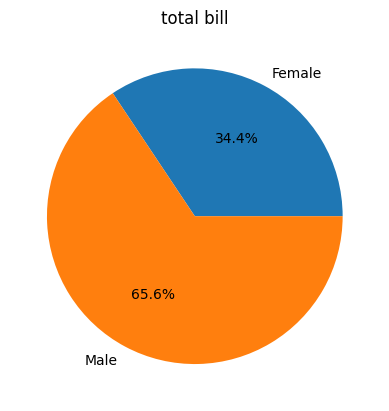

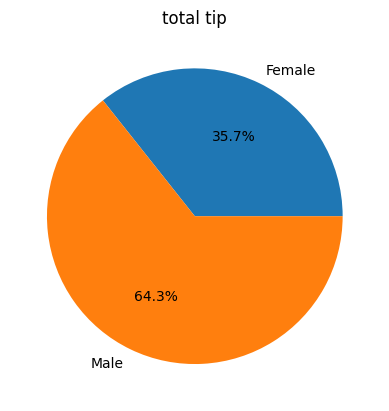

In [1598]:
import matplotlib.pyplot as plt 

st1 = df.loc[df["sex"] == "Female"]
st2 = df.loc[df["sex"] == "Male"]

a1 = int(st1["total_bill"].sum())
a2 = int(st2["total_bill"].sum())

total = a1 + a2
a1 = (a1/total) * 100
a2 = (a2/total) * 100
vals = [a1, a2]
labels = ["Female", "Male"]

plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("total bill")
plt.show()

b1 = int(st1["tip"].sum())
b2 = int(st2["tip"].sum())

total2 = b1 + b2
b1 = (b1/total2) * 100
b2 = (b2/total2) * 100
vals = [b1, b2]
labels = ["Female", "Male"]

plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("total tip")
plt.show()

at this stage

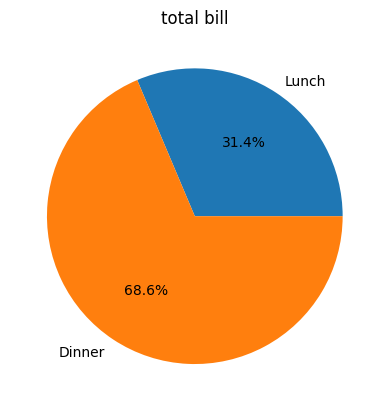

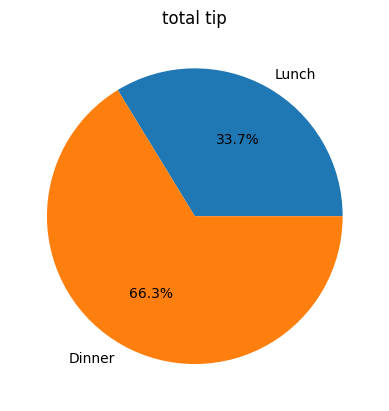

In [1599]:
import matplotlib.pyplot as plt 

st1 = df.loc[df["time"] == "Lunch"]
st2 = df.loc[df["time"] == "Dinner"]

a1 = int(st1["total_bill"].sum())
a2 = int(st2["total_bill"].sum())

total = a1 + a2
a1 = (a1/total) * 100
a2 = (a2/total) * 100
vals = [a1, a2]
labels = ["Lunch", "Dinner"]

plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("total bill")
plt.show()

b1 = int(st1["tip"].sum())
b2 = int(st2["tip"].sum())

total2 = b1 + b2
b1 = (b1/total2) * 100
b2 = (b2/total2) * 100
vals = [b1, b2]
labels = ["Lunch", "Dinner"]

plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("total tip")
plt.show()

at this stage

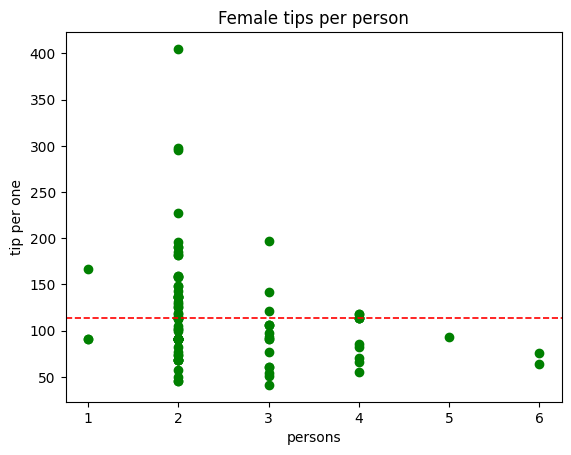

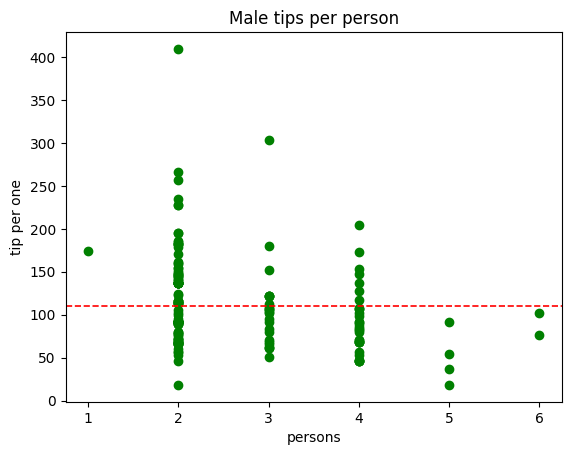

In [1600]:
import matplotlib.pyplot as plt 

st1 = df.loc[df["sex"] == "Female"]
st2 = df.loc[df["sex"] == "Male"]

y = st1["tip_per_person"]
x = st1["size"]

plt.axhline(y = st1['tip_per_person'].mean(), color='red', linestyle='--', linewidth=1.2)
plt.xlabel('persons')
plt.ylabel('tip per one')
plt.scatter(x, y, color=['green'])
plt.title('Female tips per person')
plt.show()

y = st2["tip_per_person"]
x = st2["size"]


plt.scatter(x, y, color=['green'])
plt.xlabel('persons')
plt.ylabel('tip per one')
plt.axhline(y = st2['tip_per_person'].mean(), color='red', linestyle='--', linewidth=1.2)
plt.title('Male tips per person')
plt.show()

at this stage

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


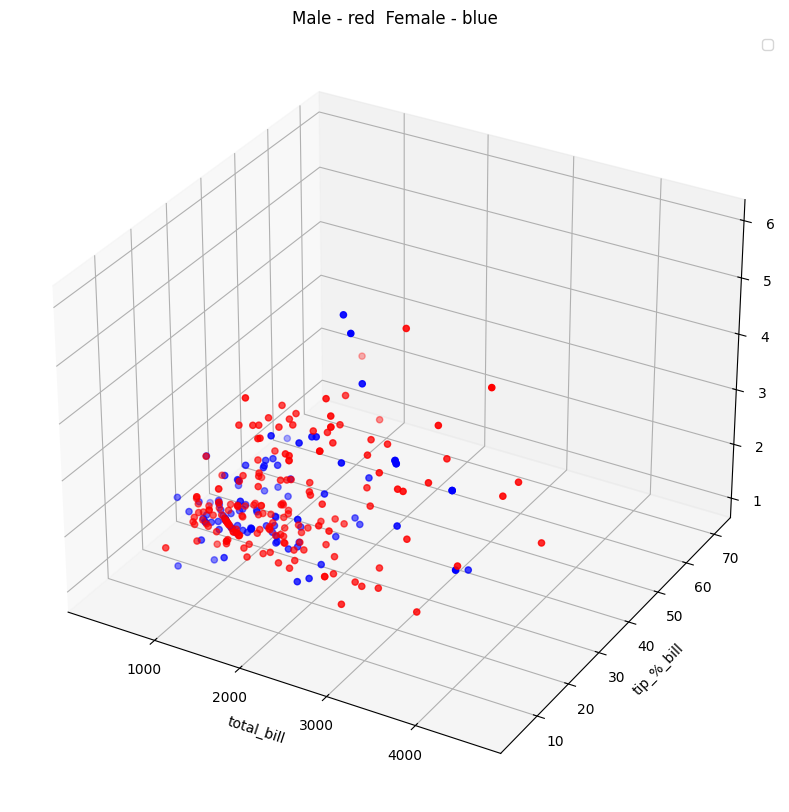

<Figure size 1200x1200 with 0 Axes>

In [1601]:
fig = plt.figure(figsize=(100, 10))
ax = fig.add_subplot(111, projection='3d')

st1 = df.loc[df["sex"] == "Female"]
st2 = df.loc[df["sex"] == "Male"]
x = st2["total_bill"]
y = st2['tip_%_bill']
z = st2["size"]

plt.figure(figsize=(12, 12))
ax.scatter(x, y, z, color='red')

x = st1["total_bill"]
y = st1['tip_%_bill']
z = st1["size"]

ax.scatter(x, y, z, color='blue')
ax.set_xlabel("total_bill")
ax.set_ylabel('tip_%_bill')
ax.set_title('Male - red  Female - blue')

ax.legend()
plt.show()

at this stage

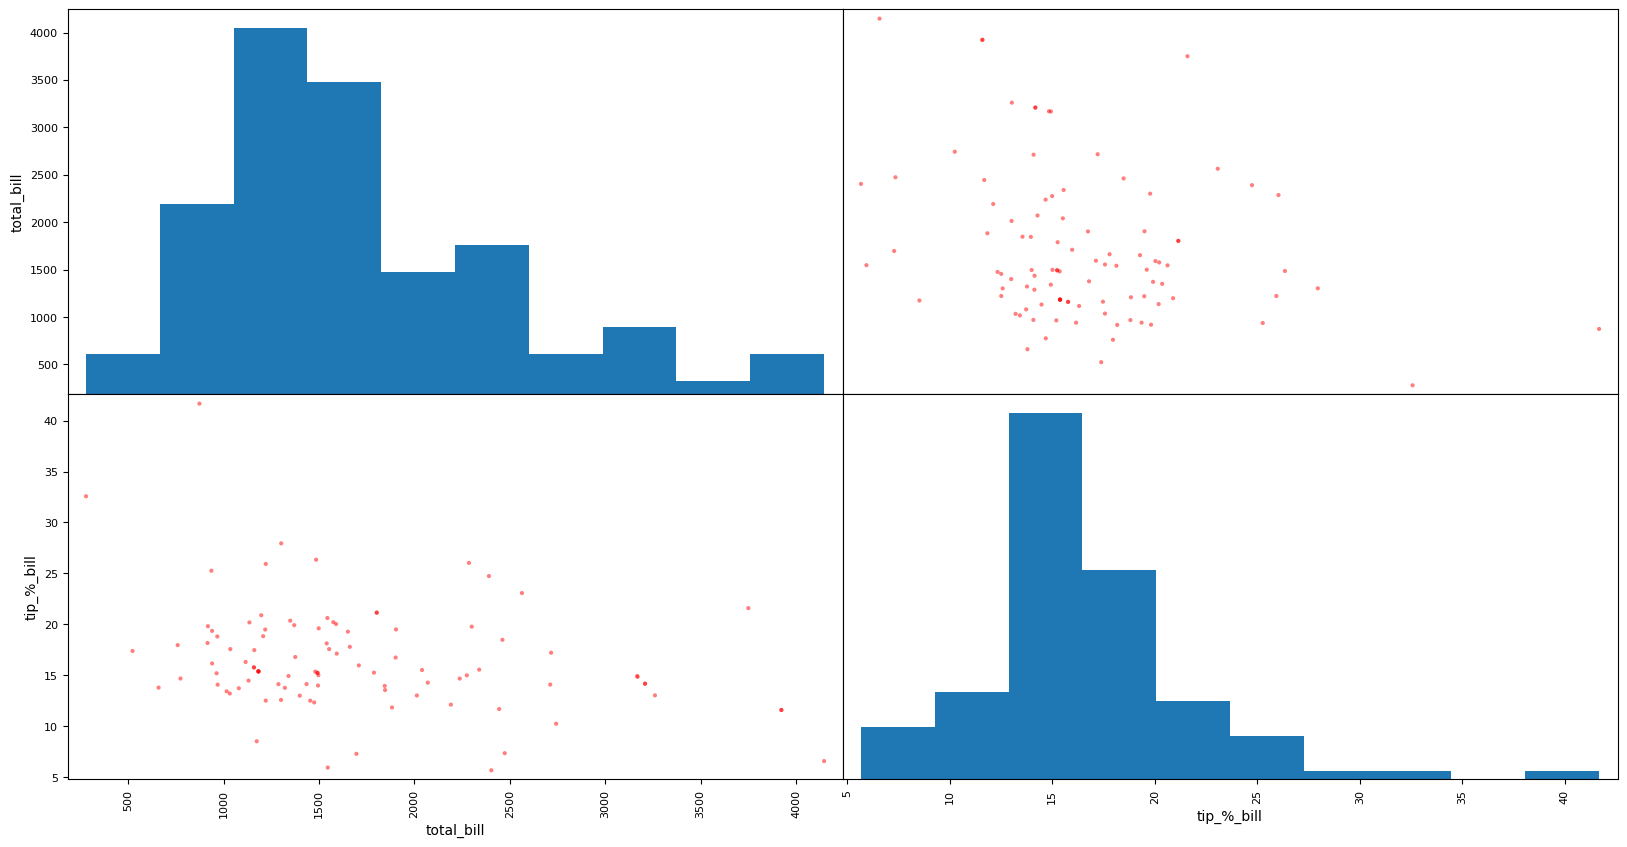

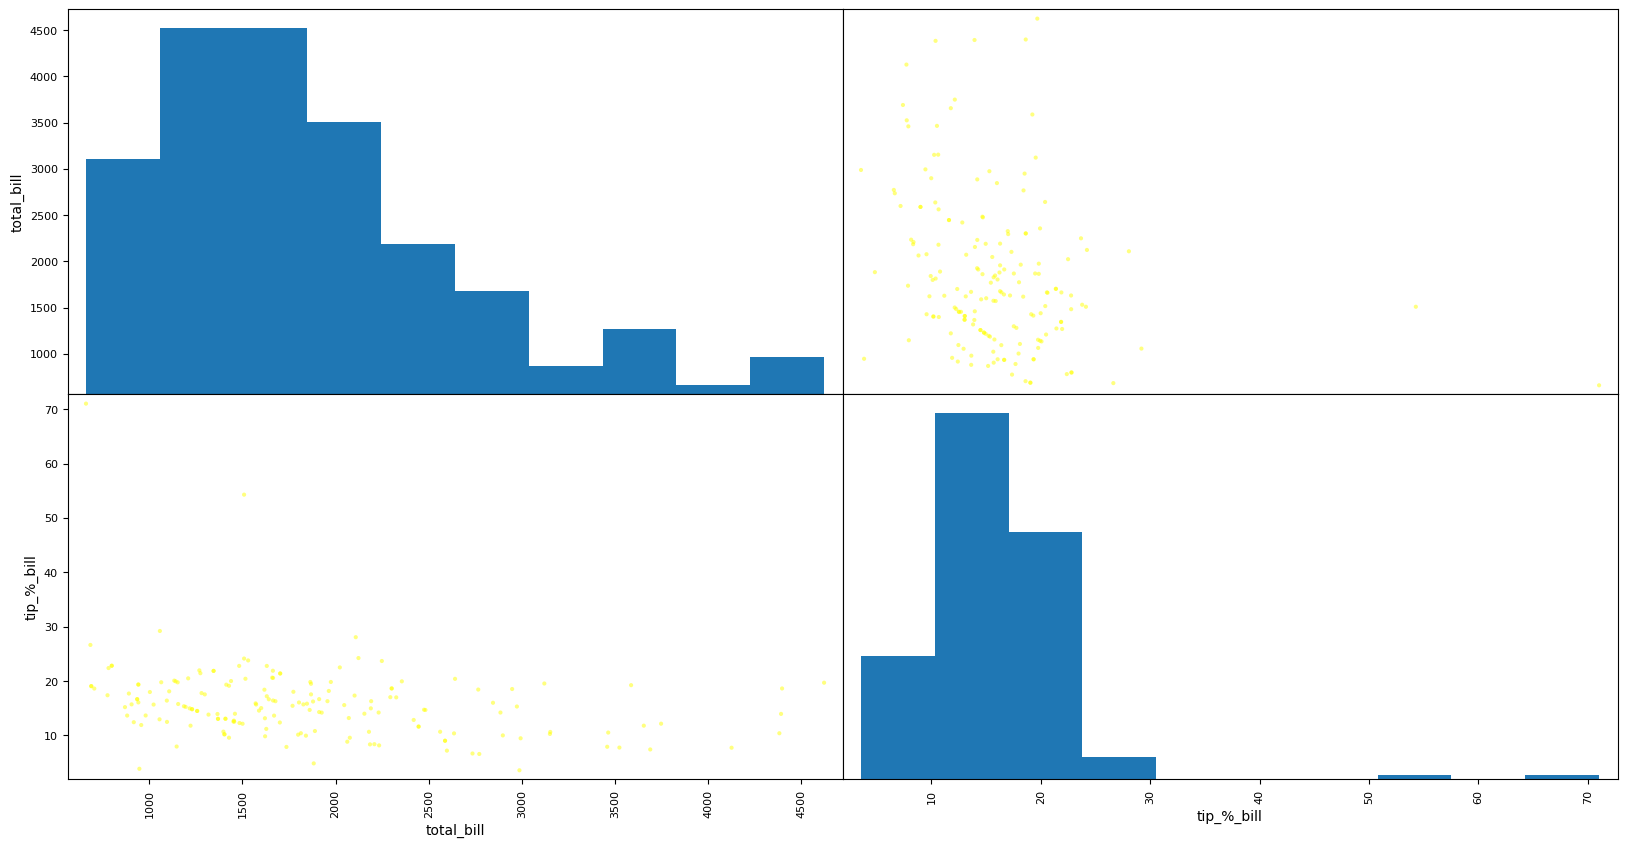

In [1602]:
st1 = df.loc[df["sex"] == "Female"]
st2 = df.loc[df["sex"] == "Male"]

st1[["total_bill", 'tip_%_bill', 'tip_per_person']].corr()

pd.plotting.scatter_matrix(pd.DataFrame(data=st1, columns=["total_bill", 'tip_%_bill']), figsize=(20, 10), color='red')
plt.show()

st2[["total_bill", 'tip_%_bill', 'tip_per_person']].corr()

pd.plotting.scatter_matrix(pd.DataFrame(data=st2, columns=["total_bill", 'tip_%_bill']), figsize=(20, 10), color='yellow')
plt.show()